<a href="https://colab.research.google.com/github/TERE-20/Inteligencia-Artificial/blob/main/Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-dev python3.8-venv -y

!python3.8 -m venv tfjs-venv

!source tfjs-venv/bin/activte

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
!tfjs-venv/bin/pip install --upgrade pip
!tfjs-venv/bin/pip install tensorflow==2.16.0rc0 tensorflowjs

#!pip install tensorflow==2.16.0rc0
!pip install tensorflow-decision-forests --upgrade

/bin/bash: line 1: tfjs-venv/bin/pip: No such file or directory
/bin/bash: line 1: tfjs-venv/bin/pip: No such file or directory
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninst

In [3]:
import os
os.environ["TF_USE_LEGACY_KERAS"]="1"

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
#paso 5 -descargar set de datos de fashion MNIM
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.SI57C8_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.SI57C8_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
#imprime los metodos del metadatos
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmp12fta1gbtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [7]:
#obtenemos en variables separadas los datos de entrenamiento 60k y prueba de 10k
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [8]:
#etequetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

In [9]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

  datos_entrenamiento = datos_entrenamiento.map(normalizar)
  datos_pruebas = datos_pruebas.map(normalizar)

  datos_entrenamiento = datos_entrenamiento.cache()
  datos_pruebas = datos_pruebas.cache()

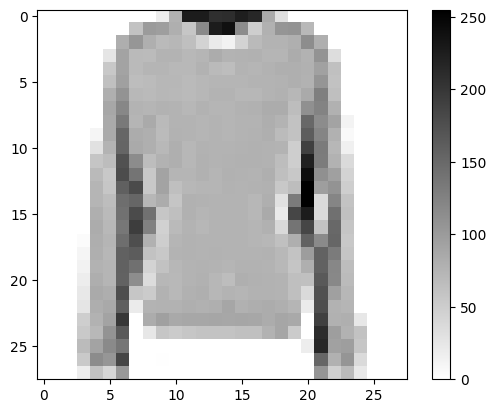

In [11]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

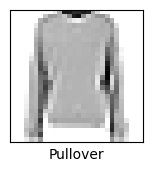

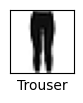

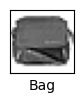

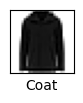

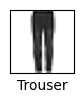

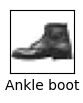

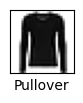

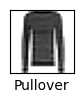

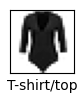

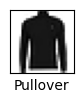

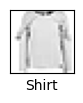

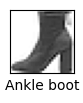

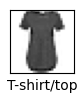

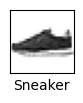

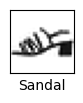

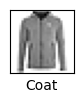

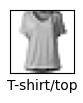

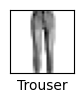

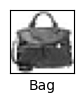

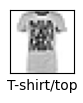

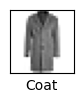

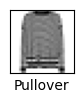

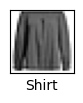

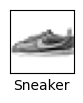

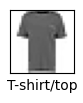

In [12]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
  plt.show()

In [13]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [14]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [16]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [17]:
TOMA_LOTE= 32

In [18]:
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TOMA_LOTE)
datos_pruebas = datos_pruebas.batch(TOMA_LOTE)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 1.7903 - accuracy: 0.6899
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6814 - accuracy: 0.7669
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6185 - accuracy: 0.7880
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5964 - accuracy: 0.7966
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5560 - accuracy: 0.8127


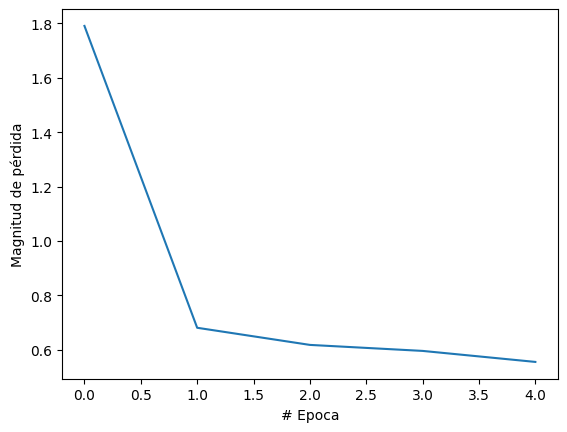

In [19]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil
                        (num_ej_entrenamiento/TOMA_LOTE))
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [20]:
import numpy as np
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

  def graficar_imagen(i, arr_predicciones, etiquetas_prueba, etiqueta_reales, imagenes):
      arr_predicciones, etiqueta_real, img =arr_predicciones[i], etiqueta_reales[i], imagenes[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img[...,0], cmap=plt.cm.binary)

      etiqueta_prediccion = np.argmax(arr_predicciones)
      if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
      else:
        color = 'red'

        plt.xlabel("{} {:2.0f} ({})".format(nombres_clases[etiqueta_prediccion],
                                            100*np.max(arr_predicciones),
                                            nombres_clases[etiqueta_real]),
                   color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones,etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

  filas = 5
  columnas = 5
  num_imagenes = filas*columnas
  plt.figure(figsize=(2*2*columnas, 2*filas))
  for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

1/1 [==============================] - 0s 113ms/step


In [21]:
    imagen = imagenes_prueba[4]
    imagen = np.array([imagen])
    prediccion = modelo.predict(imagen)
    print("Prediccion: "+ nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 65ms/step
Prediccion: Sandal


In [22]:
!mkdir clasificacion

modelo.save('celsius_fahrenhenit.h5')

!tensorflowjs_converter --input_format=keras celsius_fahrenhenit.h5 clasificacion

/bin/bash: line 1: tensorflowjs_converter: command not found


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
